# Notebook that Simulates Kalman Filter Algorithm

## Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt

/home/professor/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Kalman Implementation

In [2]:
def kalman_filter(initial_guess,guess_variance, measurements,measurement_variances, process_noise=0.0, plot = False, true_value = None,precision = 0.1):
    #initial estimations
    state_etimation = initial_guess;
    estimation_variance = guess_variance;
    N = len(measurement_variances)
    #prediction
    predicted_estimation = state_etimation;
    predicted_estimation_variance = guess_variance+process_noise;

    estimates = np.zeros(N+1)
    estimates[0] = state_etimation;
    Kalman_gains = np.zeros(N)
    if plot:
        plt.scatter(0,state_etimation,color = 'red',label = "initial_state");
    
    #iterating in for all given measurements
    for i in range(N):
        #Calculate the Kalman Gian
        Kalman_Gian = predicted_estimation_variance/(predicted_estimation_variance+measurement_variances[i])
        Kalman_gains[i] = Kalman_Gian
        #Compute the current State Estimate
        state_etimation = predicted_estimation + Kalman_Gian*(measurements[i]-predicted_estimation)
        estimates[i+1] = state_etimation
        estimation_variance = (1-Kalman_Gian)*predicted_estimation_variance

        #Compute the prediction using dynamic Model
        predicted_estimation = state_etimation;
        predicted_estimation_variance = estimation_variance+process_noise;
    if plot:
        iterations = np.arange(0,N+1)
        plt.plot(iterations[1:],estimates[1:],marker='s',markersize=5,label = "estimates")
        plt.plot(iterations[1:],measurements,marker = 10, label = "measurements")
        if true_value is not None:
            t_vals = np.ones(N+1)*true_value
            plt.plot(iterations[1:], t_vals[1:],marker=4,label = "true values")
        plt.xlabel ("Iterations")
        plt.title("Kalman Filter Simulations")
        plt.legend()
        plt.show()
        plt.figure();
        plt.plot(Kalman_gains,marker="o",markersize = 5)
        plt.title("Kalman Gians")
        plt.xlabel("Iterations")
    return estimates
    

## Kalman Filter with ADC Values

In [3]:
true_ADC_Code = 2482
measured_codes = np.array([2392,2393,2383,2386,2387,2383,2367,2384,2384,2383,2394,2282,2395,2395,2387,2384,2393,2389,2390,2378,2382,2384,2385
])
offset = -159
slope = 1326

voltages = (measured_codes-offset)/slope
voltages

array([1.92383107, 1.92458522, 1.91704374, 1.91930618, 1.92006033,
       1.91704374, 1.90497738, 1.91779789, 1.91779789, 1.91704374,
       1.92533937, 1.84087481, 1.92609351, 1.92609351, 1.92006033,
       1.91779789, 1.92458522, 1.92156863, 1.92232278, 1.913273  ,
       1.91628959, 1.91779789, 1.91855204])

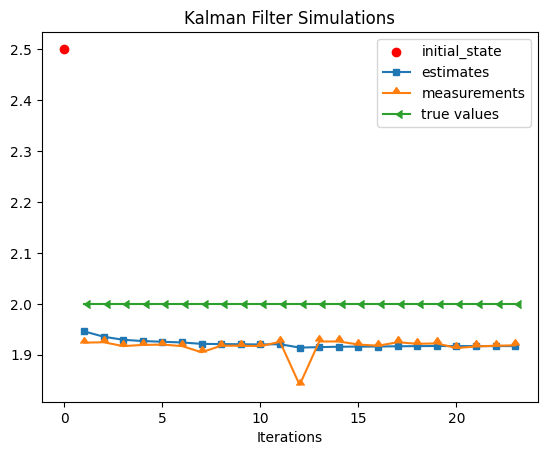

array([2.5       , 1.94599141, 1.93549818, 1.92942764, 1.92692233,
       1.92556082, 1.92415071, 1.92142722, 1.92097581, 1.92062427,
       1.92026765, 1.92072704, 1.9140948 , 1.91501494, 1.91580402,
       1.91608702, 1.91619368, 1.91668614, 1.91695679, 1.91723861,
       1.91704073, 1.91700503, 1.917041  , 1.91710659])

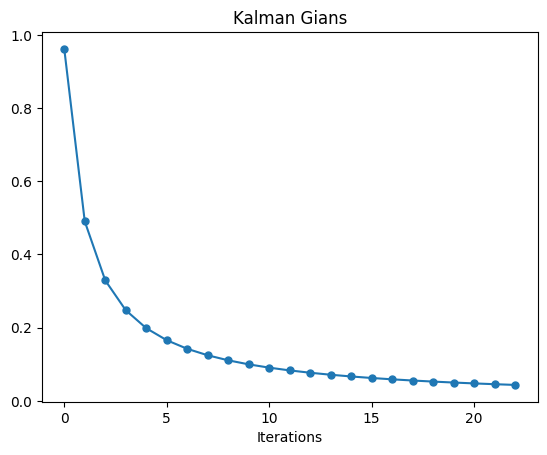

In [4]:
variances = 0.01*np.ones(len(voltages))
initial_guess = 2.5
inital_var = 0.25
kalman_filter(initial_guess,inital_var,voltages,variances,plot=True, true_value=2.00)